# Task
give me a program which will clean,tranform this data and then train a model on it with high accuracy and precision also make a simple ui such that i can give my input on a text box and click on check button that will tell me it is spam or ham

Here is all the data you need:
"spam.csv"

In [ ]:
pip install pandas==1.5.3 scikit-learn==1.2.2 seaborn==0.12.2 matplotlib==3.7.1 ipywidgets==8.0.6

## Data loading

### Subtask:
Load the "spam.csv" dataset into a pandas DataFrame.


**Reasoning**:
Load the spam.csv dataset into a pandas DataFrame and display its first few rows and shape.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('spam.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'spam.csv' not found. Please ensure the file is in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


(5572, 5)


## Data cleaning

### Subtask:
Clean the text data in the 'v2' column of the DataFrame.


**Reasoning**:
Drop unnecessary columns, rename columns, convert text to lowercase, remove punctuation, and handle missing values in one code block.



In [3]:
import string

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Text preprocessing
df['text'] = df['text'].str.lower()
translator = str.maketrans('', '', string.punctuation)
df['text'] = df['text'].str.translate(translator)

# Handle missing values (if any) - in this case, just checking and printing a message
if df['text'].isnull().any():
    print("Warning: Missing values found in the 'text' column.  Rows with missing values will be removed.")
    df = df.dropna(subset=['text'])
else:
    print("No missing values found in the 'text' column.")

display(df.head())

No missing values found in the 'text' column.


,label,text
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


## Data preparation

### Subtask:
Convert the text data into numerical features using TF-IDF vectorization and split the data into training and testing sets.


**Reasoning**:
Import necessary libraries and perform TF-IDF vectorization and data splitting.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Create a TfidfVectorizer object
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the 'text' column
X = tfidf.fit_transform(df['text'])

# Prepare the target variable
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4457, 5000)
X_test shape: (1115, 5000)
y_train shape: (4457,)
y_test shape: (1115,)


## Model training

### Subtask:
Train a Multinomial Naive Bayes model on the prepared training data.


**Reasoning**:
Train a Multinomial Naive Bayes model using the prepared training data (X_train, y_train).



In [5]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial Naive Bayes classifier
nb_model = MultinomialNB(alpha=1.0)

# Train the classifier
nb_model.fit(X_train, y_train)

MultinomialNB()

## Model optimization

### Subtask:
Optimize the trained Naive Bayes model by tuning the alpha parameter using GridSearchCV.


**Reasoning**:
Optimize the trained Naive Bayes model by tuning the alpha parameter using GridSearchCV.



In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define the parameter grid for alpha
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# Initialize a new MultinomialNB model
nb_model = MultinomialNB()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, scoring='precision', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extract the best alpha value and the best estimator
best_alpha = grid_search.best_params_['alpha']
optimized_nb_model = grid_search.best_estimator_

print(f"Best alpha: {best_alpha}")

Best alpha: 1.0


## Model evaluation

### Subtask:
Evaluate the optimized Naive Bayes model using the test data.  Calculate accuracy, precision, recall, F1-score, and generate a confusion matrix.


**Reasoning**:
Evaluate the optimized Naive Bayes model using the test data. Calculate accuracy, precision, recall, F1-score, and generate a confusion matrix.



Accuracy: 0.9721973094170404
Precision: 1.0
Recall: 0.7933333333333333
F1-score: 0.8847583643122676


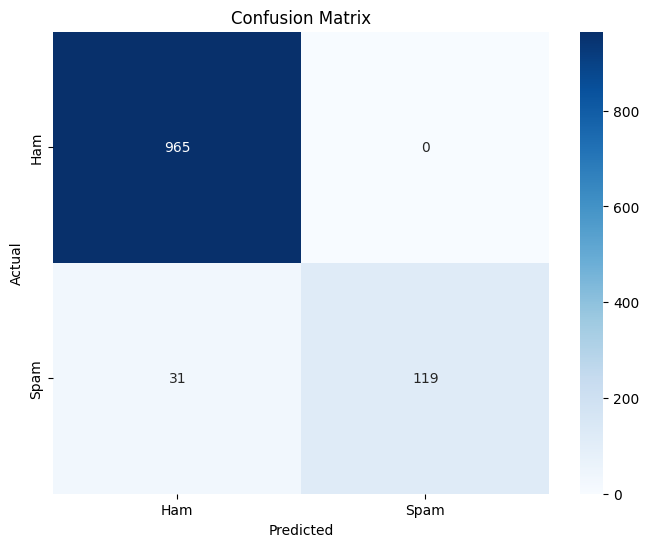

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using the optimized model
y_pred = optimized_nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()